<div>
    <img src="https://www.dropbox.com/s/crnfuz6kotkjzxa/viu_logo.png?dl=1" width="400"/>
</div>

## 02MIAR - Matemáticas para la Inteligencia Artificial
### Ejercicios Evaluables

*por Luis Arturo Izaguirre Viera - lsizaguirre@gmail.com*

---

__NOTA: Este notebook forma parte de la entrega de los ejercicios evaluables de la asignatura de Matematicas para la Inteligencia Artificial. En este documento solo se incorporan los códigos en Python asociados a los ejercicios planteados y se entrega junto a un documento (.pdf) anexo donde se desarrollan el resto de ejercicios.__

---

## Primer ejercicio.

Resuelto en el PDF anexo.

---

## Segundo ejercicio.

Sea $A \in \mathbb R^{3x3}$ la matriz cuadrada dada por
\begin{equation*}
    A = 
    \begin{pmatrix}
        3 & -3 & 2\\
        -4 & 4 & -4\\
        -3 & 3 & -2
    \end{pmatrix}
\end{equation*}

Obténgase cuatro matrices $B \in \mathbb R^{3x3}$ tales que $B^{2} = A$.
Sugerencia: diagonalizar A puede ser de utilidad. Para el proceso de diagonalización, puedes hacer uso de `numpy.linalg.eig` en Python.

### Solución: 

1.- Importamos las librerias necesarias y utilizamos un comando propio de NumPy que nos va a permitir suprimir la notación científica a la hora de imprimir valores y configurar una precisión de 5 decimales

In [1]:
import numpy as np

np.set_printoptions(suppress=True, precision=5)

<br/>
2.- Inicializamos la matriz $A$

In [2]:
A = np.array([[3,-3,2], 
              [-4,4,-4], 
              [-3,3,-2]])

<br/>
3. Para buscar una matriz B tal que $B^2 = A$, debemos encontrar los valores propios y los vectores propios

In [3]:
valores_propios, vectores_propios = np.linalg.eig(A) 

print(f'Los valores_propios de A son:\n {valores_propios}\n')
print(f'Los vectores_propios de A son:\n {vectores_propios}')

Los valores_propios de A son:
 [4. 0. 1.]

Los vectores_propios de A son:
 [[-0.57735  0.70711 -0.70711]
 [ 0.57735  0.70711  0.     ]
 [ 0.57735 -0.       0.70711]]


<br/>

Estos valores nos permitirán diagonalizar la matriz $A$ y poder escribirla de la forma $A=PDP^{-1}$ 

Nuestro objetivo es encontrar una matriz $B$, tal que $B^{2}=A$, por lo tanto podemos decir que habrá una matriz $B$, tal que $B=PD^{1/2}P^{-1}$

Para ello, primero calculamos $P$ y $P^{-1}$

In [4]:
P = vectores_propios
P_INVERTIDA = np.linalg.inv(P)

print(f'La matriz P es:\n {P}\n')
print(f'La matriz P invertida es:\n {P_INVERTIDA}\n')

La matriz P es:
 [[-0.57735  0.70711 -0.70711]
 [ 0.57735  0.70711  0.     ]
 [ 0.57735 -0.       0.70711]]

La matriz P invertida es:
 [[-1.73205  1.73205 -1.73205]
 [ 1.41421 -0.       1.41421]
 [ 1.41421 -1.41421  2.82843]]



<br/>
Para obtener la matriz diagonal $D$ lo hacemos a partir de los vectores propios.
La matriz diagonal $D$ es:
<br/><br/>

\begin{equation*}
    D = 
    \begin{pmatrix}
        4 & 0 & 0\\
        0 & 0 & 0\\
        0 & 0 & 1
    \end{pmatrix}
\end{equation*}
\
Algo realmente interesante que podemos observar acá es lo siguiente
\
\begin{equation*}
    D^{1/2} = 
    \begin{pmatrix}
        \sqrt{4} & 0 & 0\\
        0 & \sqrt{0} & 0\\
        0 & 0 & \sqrt{1}
    \end{pmatrix}
\end{equation*}
\
y como $\sqrt{ 4 } = \pm 2$ y $\sqrt{ 1 } = \pm 1$, esto nos permite construir 4 matrices diagonales para obtener 4 matrices $B$
\begin{equation*}
    D^{1/2}_{1} = 
    \begin{pmatrix}
        2 & 0 & 0\\
        0 & 0 & 0\\
        0 & 0 & 1
    \end{pmatrix}, 
    D^{1/2}_{2} = 
    \begin{pmatrix}
        2 & 0 & 0\\
        0 & 0 & 0\\
        0 & 0 & -1
    \end{pmatrix}, 
    D^{1/2}_{3} = 
    \begin{pmatrix}
        -2 & 0 & 0\\
        0 & 0 & 0\\
        0 & 0 & 1
    \end{pmatrix}, 
    D^{1/2}_{4} = 
    \begin{pmatrix}
        -2 & 0 & 0\\
        0 & 0 & 0\\
        0 & 0 & -1
    \end{pmatrix}
\end{equation*}

<br/>
Primer caso, con:
\begin{equation*}
    D^{1/2}_{1} = 
    \begin{pmatrix}
        2 & 0 & 0\\
        0 & 0 & 0\\
        0 & 0 & 1
    \end{pmatrix}
\end{equation*} 

In [5]:
D_SQRT = np.array([[2, 0, 0], [0, 0, 0], [0, 0, 1]])

B = np.matmul(np.matmul(P,D_SQRT), P_INVERTIDA)
print(f'La matriz B es:\n {B}\n')

BB = np.matmul(B,B)
print(f'La matriz B**2 es:\n {BB}\n')

La matriz B es:
 [[ 1. -1.  0.]
 [-2.  2. -2.]
 [-1.  1. -0.]]

La matriz B**2 es:
 [[ 3. -3.  2.]
 [-4.  4. -4.]
 [-3.  3. -2.]]



<br/>
Segundo caso, con:
\begin{equation*}
    D^{1/2}_{2} = 
    \begin{pmatrix}
        -2 & 0 & 0\\
        0 & 0 & 0\\
        0 & 0 & 1
    \end{pmatrix}
\end{equation*} 

In [6]:
D_SQRT = np.array([[-2, 0, 0], [0, 0, 0], [0, 0, 1]])

B = np.matmul(np.matmul(P,D_SQRT), P_INVERTIDA)
print(f'La matriz B es:\n {B}\n')

BB = np.matmul(B,B)
print(f'La matriz B**2 es:\n {BB}\n')

La matriz B es:
 [[-3.  3. -4.]
 [ 2. -2.  2.]
 [ 3. -3.  4.]]

La matriz B**2 es:
 [[ 3. -3.  2.]
 [-4.  4. -4.]
 [-3.  3. -2.]]



<br/>
Tercer caso, con:
\begin{equation*}
    D^{1/2}_{3} = 
    \begin{pmatrix}
        2 & 0 & 0\\
        0 & 0 & 0\\
        0 & 0 & -1
    \end{pmatrix}
\end{equation*} 

In [7]:
D_SQRT = np.array([[2, 0, 0], [0, 0, 0], [0, 0, -1]])

B = np.matmul(np.matmul(P,D_SQRT), P_INVERTIDA)
print(f'La matriz B es:\n {B}\n')

BB = np.matmul(B,B)
print(f'La matriz B**2 es:\n {BB}\n')

La matriz B es:
 [[ 3. -3.  4.]
 [-2.  2. -2.]
 [-3.  3. -4.]]

La matriz B**2 es:
 [[ 3. -3.  2.]
 [-4.  4. -4.]
 [-3.  3. -2.]]



<br/>
Cuarto caso, con:
\begin{equation*}
    D^{1/2}_{4} = 
    \begin{pmatrix}
        -2 & 0 & 0\\
        0 & 0 & 0\\
        0 & 0 & -1
    \end{pmatrix}
\end{equation*} 

In [8]:
D_SQRT = np.array([[-2, 0, 0], [0, 0, 0], [0, 0, -1]])

B = np.matmul(np.matmul(P,D_SQRT), P_INVERTIDA)
print(f'La matriz B es:\n {B}\n')

BB = np.matmul(B,B)
print(f'La matriz B**2 es:\n {BB}\n')

La matriz B es:
 [[-1.  1. -0.]
 [ 2. -2.  2.]
 [ 1. -1.  0.]]

La matriz B**2 es:
 [[ 3. -3.  2.]
 [-4.  4. -4.]
 [-3.  3. -2.]]



\
En conclusión las cuatro matrices $B \in \mathbb R^{3x3}$ tales que $B^{2} = A$, serian:
<br/><br/>
\begin{equation*}
    B_{1} = 
    \begin{pmatrix}
        1 & -1 & 0\\
        -2 & 2 & -2\\
        -1 & 1 & 0
    \end{pmatrix}, 
    B_{2} = 
    \begin{pmatrix}
        -3 & 3 & -4\\
        -2 & 2 & -2\\
        3 & -3 & 4
    \end{pmatrix}, 
    B_{3} = 
    \begin{pmatrix}
        3 & -3 & 4\\
        -2 & 2 & -2\\
        -3 & 3 & -4
    \end{pmatrix}, 
    B_{4} = 
    \begin{pmatrix}
        -1 & 1 & 0\\
        2 & -2 & 2\\
        1 & -1 & 0
    \end{pmatrix}
\end{equation*}
<br/><br/>

---

## Tercer ejercicio


Prográmese el método de gradient descent para funciones de $n$ variables. La función deberá tener como parámetros de entradas:

- El gradiente de la función que se desea minimizar $ \nabla f $.
- Un valor inicial $X_{0} \in \mathbb R^{n}$.
- El ratio de aprendizaje $\gamma$ (que se asume constante para cada iteración).
- Un parámetro de tolerancia `tol` (con el que finalizar el proceso cuando $|f’(x)|<tol$). Un nu ́mero máximo de iteraciones `maxit`.

La salida de la función deberá ser la aproximación del x que cumple $f′(x) \approx 0$, correspondiente a la última iteración realizada en el método.

### Solución: 

En primer lugar vamos a implementar la función gradiente bajo las condiciones especificadas.

In [9]:
import numpy as np

def gradient_descent(max_iterations, threshold, w_init, obj_func,grad_func, learning_rate=0.05):
    
    w = np.array(w_init)
    w_history = w
    f_history = obj_func(w)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        delta_w = -learning_rate*np.array(grad_func(w))
        w = w+delta_w
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history

Adicionalmente construiremos una función para la visualización de los resultados en un espacio de tres dimensiones

In [10]:
import matplotlib.pyplot as plt

def visualize_3D(w_history, fn):  
    res = 100
    
    _X = np.linspace(-5, 5, res)
    _Y = np.linspace(-5, 5, res)
    _Z = np.zeros((res, res))

    for ix, x in enumerate(_X):
        for iy, y in enumerate(_Y):
            _Z[iy, ix] = fn([x, y])

    plt.contourf(_X, _Y, _Z, 1000)
    plt.colorbar()
    plt.plot(w_history[0,0],w_history[0,1],marker='o',c='white') 
    for _ in np.arange(1,len(w_history)):
        if(_%15 == 0):
            plt.plot(w_history[_,0],w_history[_,1],marker='x',c='red') 
    plt.plot(w_history[-1,0],w_history[-1,1],marker='o',c='green') 
    plt.show()

A continuación, aplica el método a los casos siguientes:

### a) $g(x,y)=x^{2}+y^{2}−xy+2y+1$,

con $x_{0}$ = (3,4), $\gamma$ =0.01, tol= 1e-12, maxit= 1e5. 

Contrasta el resultado obtenido numéricamente con el estudio analítico de la función.

In [11]:
obj_func = lambda v: (v[0] ** 2) + (v[1] ** 2) - (v[0] * v[1]) + (2 * v[1]) + 1
grad_func = lambda v: (2 * v[0] - v[1], 2 * v[1] + 2 - v[0]) 

w_history, f_history = gradient_descent(1e5, 1e-12, (3,4), obj_func, grad_func, 0.01)

print(f'El punto minimo encontrado para la funcion es el definido por {w_history[len(w_history)-1]}')
print(f'Este punto se encontó en {len(w_history)} iteraciones.')

El punto minimo encontrado para la funcion es el definido por [-0.66666 -1.33333]
Este punto se encontó en 1332 iteraciones.


<br>

Ahora procederemos a visualmente observar los resultados.

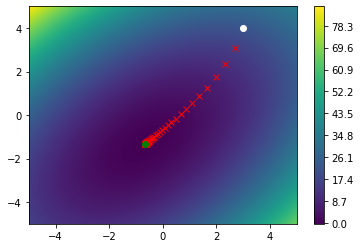

In [12]:
visualize_3D(w_history, obj_func)

<br>

Los resultados obtenidos concuerdan con el estudio analítico de la función.

Dada la función, $g(x,y)=x^{2}+y^{2}−xy+2y+1$

sus derivadas parciales serían:

$\frac{\partial g}{\partial x} = 2x - y$

$\frac{\partial g}{\partial y} = 2y - x + 2$

Resolviendo el sistema definido por las derivadas anteriores tenemos que:

- x = -2/3
- y = -4/3

Lo que concuerda con el estudio númerico

### b) $f(x) =3x^{4} + 4x^{3} - 12x^{2} + 7$

- Aplica el método sobre f(x) con $x_{0}$ = 3, $\gamma$ = 0.001, tol=1e-12, maxit=1e5

In [13]:
obj_func_f = lambda x: (3 * x ** 4) + (4 * x ** 3) - (12 * x ** 2) + 7

grad_func_f = lambda x: (12 * x ** 3) + (12 * x ** 2) - (24 * x) 

w_history_f1, f_history_f1 = gradient_descent(1e5, 1e-12, 3, obj_func_f, grad_func_f, 0.00001)
print(f'El punto minimo encontrado para la funcion es el definido por {w_history_f1[len(w_history_f1)-1]}')
print(f'Este punto se encontó en {len(w_history_f1)} iteraciones.')

El punto minimo encontrado para la funcion es el definido por [1.00001]
Este punto se encontó en 30393 iteraciones.


- Aplica de nuevo el método sobre f(x) con $x_{0}$ = 3, $\gamma$ = 0.01, tol=1e-12, maxit=1e5.

In [14]:
w_history_f2, f_history_f2 = gradient_descent(1e5, 1e-12, 3, obj_func_f, grad_func_f, 0.01)
print(f'El punto minimo encontrado para la funcion es el definido por {w_history_f2[len(w_history_f2)-1]}')
print(f'Este punto se encontó en {len(w_history_f2)} iteraciones.')

El punto minimo encontrado para la funcion es el definido por [-2.]
Este punto se encontó en 21 iteraciones.


- Contrasta e interpreta los dos resultados obtenidos en los apartados anteriores y compáralos con los mínimos locales obtenidos analíticamente. ¿Qué influencia puede llegar a tener la elección del ratio de aprendizaje $\gamma$?

Para hacer este analisis, vamos primero a definir una funcion de visualización que nos permita visualizar que ha sucedido en este caso en 2D

In [15]:
def visualize_2D(fn, w_history, f_history):
    res= 200
    
    _X = np.linspace(-3, 3, res)
    _Y = np.zeros((res, res))
    
    for ix, x in enumerate(_X):
        _Y[ix] = fn(x)
        
    fig, ax = plt.subplots()
    ax.plot(_X, _Y)
    
    frame = (len(w_history) // 1000) + 1
          
    plt.plot(w_history[0], f_history[0],marker='o',c='black') 
    for _ in np.arange(1,len(w_history)):
        if(_ % frame == 0):
            plt.plot(w_history[_], f_history[_],marker='x',c='red') 
    plt.plot(w_history[-1], f_history[-1],marker='o',c='green') 
    
    ax.grid()
    plt.show()

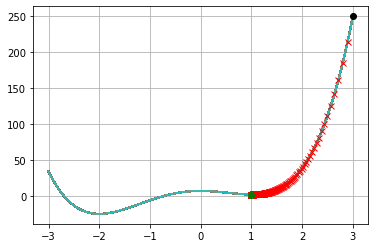

In [16]:
visualize_2D(obj_func_f, w_history_f1, f_history_f1)

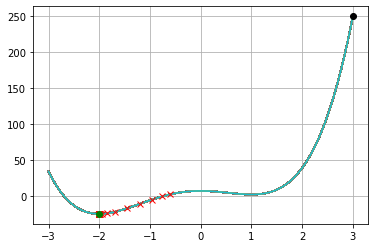

In [17]:
visualize_2D(obj_func_f, w_history_f2, f_history_f2)

Analizando la derivada:
    
$f'(x) = 12x^{3}+12x^{2}-24x$

Podemos igualarla a cero y factorizar, obteniendo:

$f'(x) = 12x\left(x-1\right)\left(x+2\right)$

igualando a cero la derivada encontraríamos tres puntos críticos. El máximo local `0` y los mínimos locales `-2` y `1`

Lo que concuerda perfectamente con los casos obtenidos con la función programada en Python

__Conclusión:__ Del punto de partida y el ratio de aprendizaje depende a cuál mínimo nos acerquemos. Con un ratio de aprendizaje más pequeños iremos haciendo pequeños saltos y esto hará probable que nos acerquemos al mínimo local más cercano del punto $X_{0}$, mientras que si usamos un ratio de aprendizaje mayor los saltos iniciales serán más grandes y eso nos podría llevar a otro punto mínimo, como fue el caso.

- Aplica de nuevo el método sobre f(x) con $x_{0}$ = 3, $\gamma$ = 0.1, tol=1e-12, maxit=1e5. Interpreta el resultado.

In [18]:
w_history_f3, f_history_f3 = gradient_descent(1e5, 1e-12, 3, obj_func_f, grad_func_f, 0.1)
print(f'El punto minimo encontrado para la funcion es el definido por {w_history_f3[len(w_history_f3)-1]}')
print(w_history_f3)

El punto minimo encontrado para la funcion es el definido por [-5.95171e+125]
[[ 3.00000e+000]
 [-3.30000e+001]
 [ 4.17054e+004]
 [-8.70500e+013]
 [ 7.91565e+041]
 [-5.95171e+125]]


<ipython-input-13-53e562a87fe0>:1: RuntimeWarning: overflow encountered in double_scalars
  obj_func_f = lambda x: (3 * x ** 4) + (4 * x ** 3) - (12 * x ** 2) + 7
<ipython-input-13-53e562a87fe0>:1: RuntimeWarning: invalid value encountered in double_scalars
  obj_func_f = lambda x: (3 * x ** 4) + (4 * x ** 3) - (12 * x ** 2) + 7


__Interpretación:__ En este caso analizando los valores de nuestra función gradiente, nos damos cuenta que al utilizar un ratio de aprendizaje mucho mayor que en casos anteriores (0.1), Los saltos que se fueron dando tambien son grandes y los puntos empezaron a moverse entre derecha e izquierda en cada salto alejandose cada vez más del objetivo hasta hacerse infinito.

- Finalmente aplica el método sobre f(x) con $x_{0}$ = 0, $\gamma$ = 0.001, tol=1e-12, maxit=1e5. Interpreta el resultado y comp ́aralo con el estudio anal ́ıtico de f. ¿Es correcto el resultado? ¿Por qu ́e? ¿A qu ́e se debe el feno ́meno?

In [19]:
w_history_f4, f_history_f4 = gradient_descent(1e5, 1e-12, 0, obj_func_f, grad_func_f, 0.001)
print(f'El punto minimo encontrado para la funcion es el definido por {w_history_f4[len(w_history_f4)-1]}')
print(f'Este punto se encontó en {len(w_history_f4)} iteraciones.')
print(w_history_f4)

El punto minimo encontrado para la funcion es el definido por [0.]
Este punto se encontó en 2 iteraciones.
[[0.]
 [0.]]


__Interpretación:__ Comparando el resultado con el estudio analitico de f, hace sentido pues el punto 0 es un punto crítico de la función, solo que en este caso se trata de un máximo local. Al haber comenzado nuestra evaluación en el punto 0, cumplió la condición de salida en la primera iteración, encontrando un punto donde la evaluación de la derivada es aproximadamente 0.

__Conclusión:__ Es realmente relevante para el estudio de una función, la certera elección del punto de partida y del ratio de aprendizaje.

---

## Cuarto ejercicio

NOTA: De este ejercicio solo se realizará el código en este documento. El analisis del mismo se encuentra en documento PDF anexo.

b) Realiza una simulación en Python para este problema, estimando la probabilidad tras realizar una cantidad elevada de simulaciones del problema. La función deberá tener como parámetro de entrada el número de simulaciones n y como parámetro de salida una estimación de la probabilidad p. Para simular la extracción de las cartas y del lado visible tras la extracción puedes valerte de random.randint. Recuerda que durante la simulación sólo deberán contabilizarse los experimentos en los que la cara visible de la carta obtenida ha sido verde y, sobre estos, estimar la proporción de veces en las que la carta de la que procede ha resultado ser la que es verde por ambas caras.

In [20]:
import random

numero_de_simulaciones = 100000 # Nro de simulaciones que se ejecutarán

def simulacion(numero_de_simulaciones):
    contador_de_exitos = 0
    contador_de_experimentos = 0

    # Definición de las cartas
    cartas = [('roja', 'roja'), ('roja', 'verde'), ('verde', 'verde')]

    for _ in range(numero_de_simulaciones):
        # Se elige una carta de las tres posibles
        carta_de_la_bolsa = cartas[random.randint(0,2)]
        
        # De la carta elegida se toma una de las caras
        cara_visible = carta_de_la_bolsa[random.randint(0,1)]

        if cara_visible == 'verde': # Si la cara es verde se cuenta el experimento
            contador_de_experimentos += 1
            if carta_de_la_bolsa == ('verde', 'verde'): # Si la carta es la verde, verde se cuenta como éxito
                contador_de_exitos += 1
    
    # Se retorna la probabilidad, relación de casos de exito entre casos contabilizados (cara visible verde)
    return contador_de_exitos/contador_de_experimentos 

print(f'La probabilidad obtenida de la simulación es de: {simulacion(numero_de_simulaciones)}')

La probabilidad obtenida de la simulación es de: 0.66567033317392
